### Task : Multiple Regression
#### Input Features (Predictor Variables) : R&D Spend, Administration, Marketing Spend, State	
#### Output (Response Variables) : Profit

### Importing the necessary modules

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, base

### Collecting, Analyzing and Visualizing the data

In [5]:
path = os.path.abspath(os.path.join("Datasets", "50_Startups.csv"))

path = path.replace(os.path.join("Supervised", "Regression", "Linear_Regression"), "")

In [6]:
# Loading the dataset into a data frame

df = pd.read_csv(path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [56]:
# Checking for null values

print(df.isna().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [57]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [58]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [59]:
# Correlation Matrix (Pearson Correlation Co-effecient)

corr_matrix = df.corr()

corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [60]:
corr_matrix['Profit'].sort_values(ascending = False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

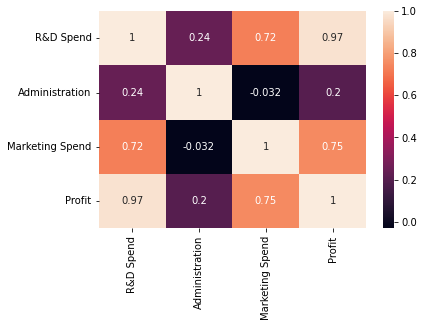

In [61]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [62]:
num_attr = corr_matrix['Profit'].sort_values(ascending = False).keys()
cat_attr = ['State']

target = df.iloc[:, -1]

In [63]:
for var in num_attr:
    print(df.groupby('State')[var].mean().sort_values(ascending = False), '\n')

State
Florida       118774.024375
New York      113756.446471
California    103905.175294
Name: Profit, dtype: float64 

State
Florida       80724.016250
New York      76195.062353
California    64657.674118
Name: R&D Spend, dtype: float64 

State
Florida       247323.551250
New York      205346.015882
California    182540.929412
Name: Marketing Spend, dtype: float64 

State
Florida       121768.897500
New York      121543.470588
California    120746.507059
Name: Administration, dtype: float64 



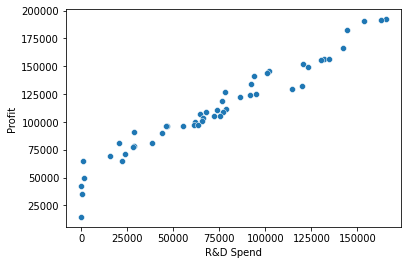

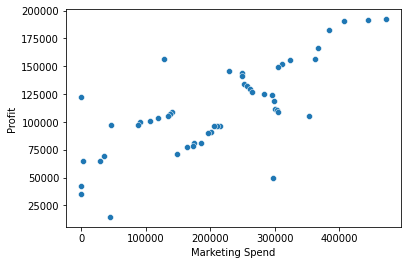

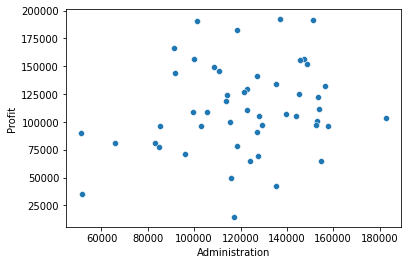

In [64]:
# Scatter Plot

for var in num_attr[1:]:
    sns.scatterplot(x = var, y = target, data = df)
    plt.show()

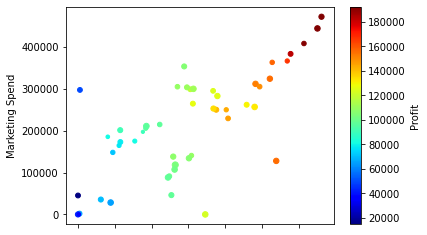

In [65]:
df.plot(kind = 'scatter', x = 'R&D Spend', y = 'Marketing Spend', s = df['Administration'] / 5000, c = 'Profit', cmap = plt.get_cmap('jet'), colorbar = True)
plt.show()

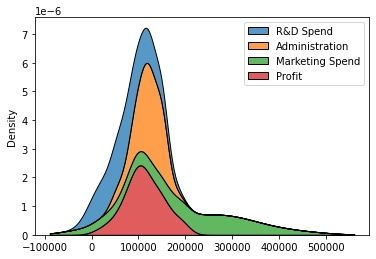

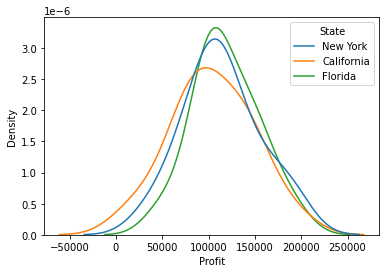

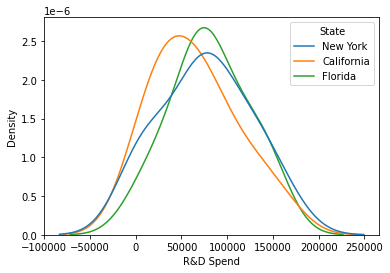

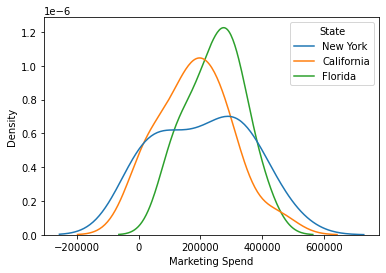

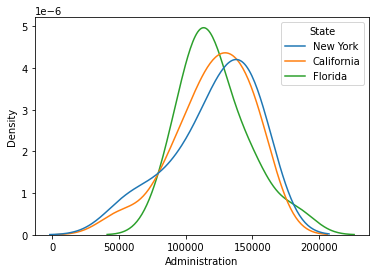

In [66]:
# Kernel Density Plot

sns.kdeplot(data = df, multiple = 'stack')
plt.show()

colors = ['red', 'blue', 'green', 'orange', 'pink', 'yellow']
for var, c in zip(num_attr, colors[:len(num_attr)]):
    sns.kdeplot(x = var, hue = 'State', data = df, color = c)
    plt.show()

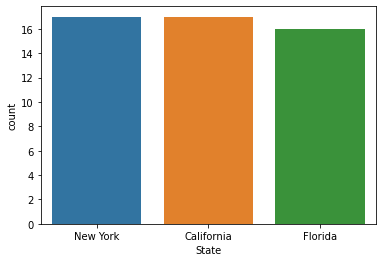

In [67]:
# Count Plot

for var in cat_attr:
    sns.countplot(x = var, data = df)
    plt.show()

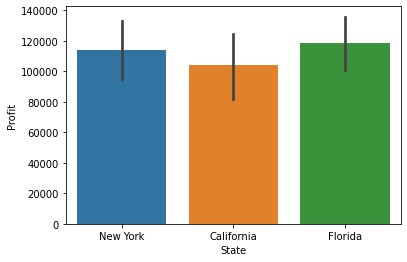

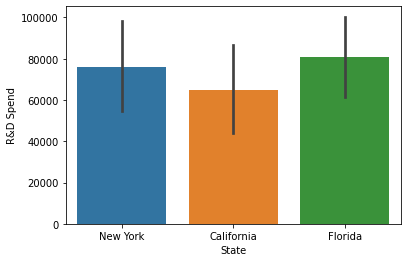

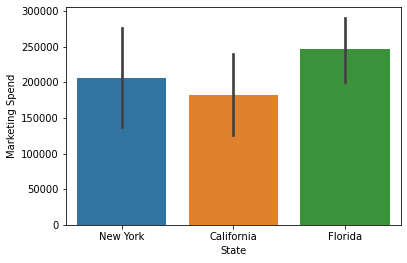

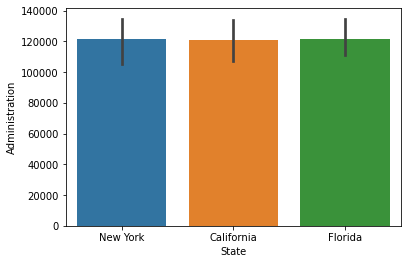

In [68]:
# Bar Chart

for var in num_attr:
    sns.barplot(x = 'State', y = var, data = df)
    plt.show()

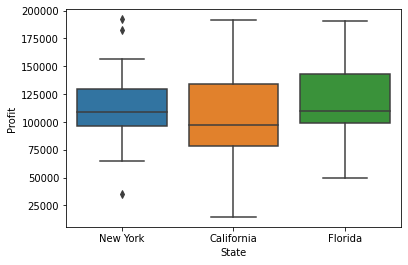

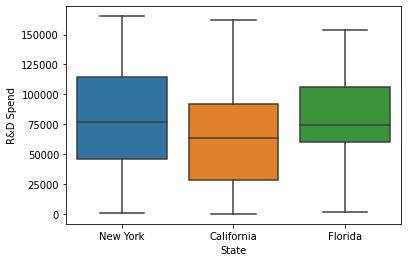

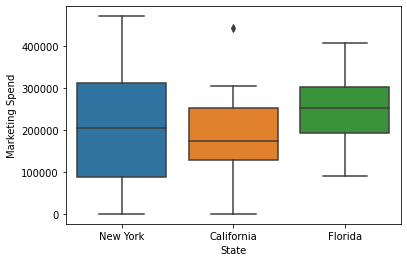

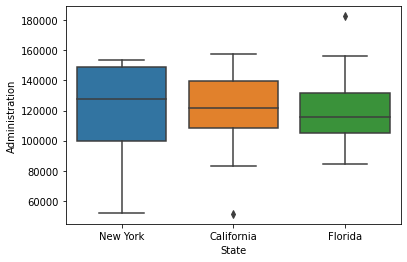

In [69]:
# Box Plot (Identifying the skewness)

for var in num_attr:
    sns.boxplot(x = 'State', y = var, data = df)
    plt.show()

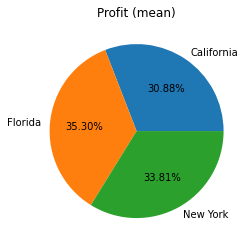

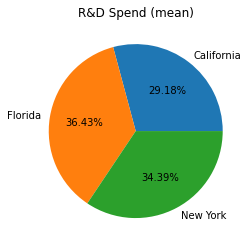

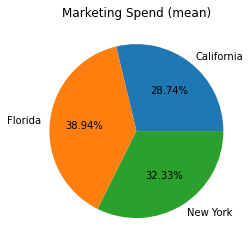

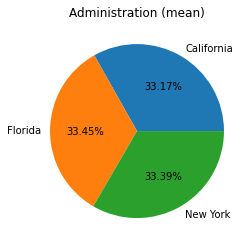

In [70]:
# Pie Chart

for var in num_attr:
    plt.title(var + " (mean)")
    plt.pie(x = df.groupby('State')[var].mean(), labels = np.unique(df['State']), autopct = "%1.2f%%", data = df)
    plt.show()

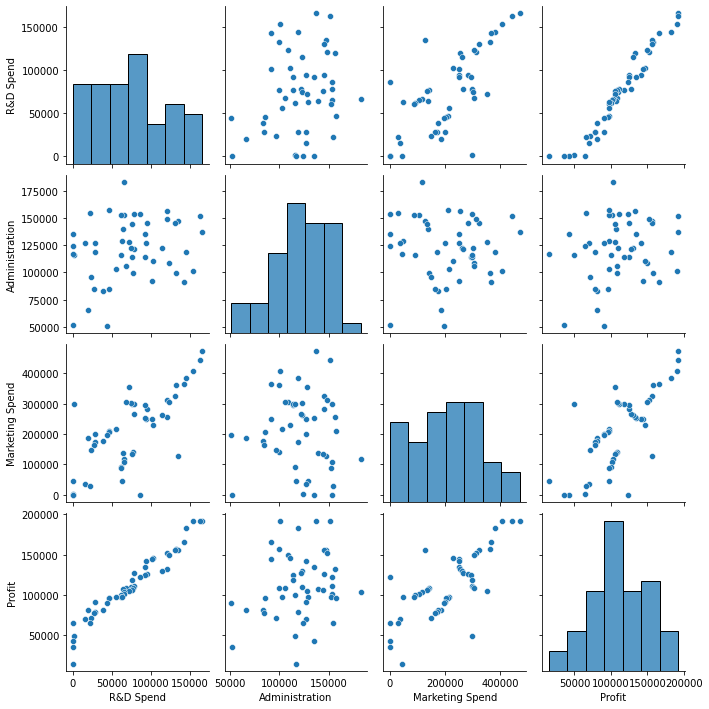

In [71]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

In [72]:
# Encoding categorical attributes (One Hot Encoding)

encoder = preprocessing.OneHotEncoder()

states = pd.DataFrame(encoder.fit_transform(df[['State']]).toarray().astype(int), columns = np.unique(df['State']))

df = pd.concat([df, states], axis = 1).drop(['State', 'New York'], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [73]:
# Scaling the features (Standard Scaling)

scaler = preprocessing.StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df.loc[:, num_attr]), columns = num_attr)

scaled_df = pd.concat([scaled_df, states], axis = 1).drop(['New York'], axis = 1)
scaled_df.head()

,Profit,R&D Spend,Marketing Spend,Administration,California,Florida
0,2.011203,2.016411,2.153943,0.560753,0,0
1,1.999430,1.955860,1.923600,1.082807,1,0
2,1.980842,1.754364,1.626528,-0.728257,0,1
3,1.776627,1.554784,1.422210,-0.096365,0,0
4,1.357740,1.504937,1.281528,-1.079919,0,1


### Preparing the data

In [74]:
X = scaled_df.drop('Profit', axis = 1).values
y = scaled_df['Profit'].values

In [75]:
# Stratified Split

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(scaled_df, scaled_df[['California', 'Florida']]):
    train_set = scaled_df.iloc[train_index]
    test_set = scaled_df.iloc[test_index]

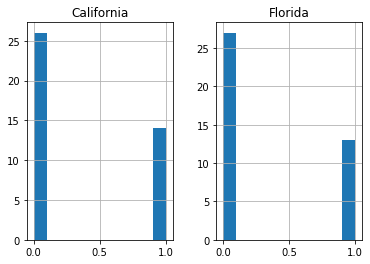

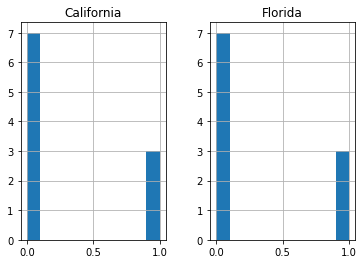

In [76]:
# Checking whether the samples are uniformely distributed

train_set[['California', 'Florida']].hist()
plt.show()

test_set[['California', 'Florida']].hist()
plt.show()

In [77]:
X_train = train_set.drop('Profit', axis = 1).values
X_test = test_set.drop('Profit', axis = 1).values
y_train = train_set['Profit'].values
y_test = test_set['Profit'].values

### Training the model and Evaluating it's performance

In [78]:
# Implementing Linear Regression from scratch using Gradient Descent

class LinearRegression:
    
    def __init__(self, n_iter = 100000, lr = 0.001):
        self.n_iter = n_iter
        self.lr = lr
        self.weights = self.bias = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        r2_score = metrics.r2_score(y, y_pred)
        return r2_score

In [79]:
# Training the Model

reg = LinearRegression()

reg.fit(X_train, y_train)

print("Training Score :", reg.score(X_train, y_train))

Training Score : 0.9433928313203785


In [80]:
r2_score = reg.score(X_test, y_test)

print("Testing Score :", r2_score)

Testing Score : 0.9729487164790624


#### Sklearn Implementation

In [81]:
# Training the Model

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Making Predictions on train set

y_pred = model.predict(X_train)

r2_score = model.score(X_train, y_train)

print("Train Score :", r2_score)

Training Score : 0.9433928313431346


### Validating the model

In [83]:
r2_score = model.score(X_test, y_test)

print("Test Score :", r2_score)

Testing Score : 0.9729483501707327
